# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [22]:
os.path.abspath("Lyrics and Description EDA.ipynb")

'C:\\Users\\tysir\\Lyrics and Description EDA.ipynb'

In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here




In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/tysir/Documents/ads-new-lyric/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0
    num_characters = sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [5]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements are beneficial to help you catch bugs early by making sure your code is doing what you expect while you're writing and testing it.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [6]:
# Read in the lyrics data

lyrics_data = {}

for artist in ["cher", "robyn"]:
    artist_path = os.path.join(data_location, lyrics_folder, artist)
    lyrics_data[artist] = {}

    for filename in os.listdir(artist_path):
        if filename.endswith(".txt"):
            song_title = filename.replace(".txt", "")
            file_path = os.path.join(artist_path, filename)
            with open(file_path, "r", encoding="utf-8") as file:
                lyrics_data[artist][song_title] = file.read()

In [7]:
# Read in the twitter data

twitter_data = {}

files = {
    "cher": "cher_followers_data.txt",
    "robyn": "robynkonichiwa_followers_data.txt"}

for artist, filename in files.items():
    path = os.path.join(data_location, twitter_folder, filename)
    with open(path, "r", encoding="utf-8") as file:
        descriptions = file.readlines()
        twitter_data[artist] = [desc.strip() for desc in descriptions if desc.strip()]

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [8]:
punctuation = set(punctuation) # speeds up comparison

In [9]:
# create your clean twitter data here

clean_twitter_data = {}

for artist, descriptions in twitter_data.items():
    all_tokens = []
    for desc in descriptions:
        tokens = desc.lower().split()
        tokens = [word.strip("".join(punctuation)) for word in tokens]
        tokens = [word for word in tokens if word and word not in sw]
        all_tokens.extend(tokens)
    clean_twitter_data[artist] = all_tokens

In [10]:
# create your clean lyrics data here

clean_lyrics_data = {}

for artist, songs in lyrics_data.items():
    all_tokens = []
    for song, text in songs.items():
        tokens = text.lower().split()
        tokens = [word.strip("".join(punctuation)) for word in tokens]
        tokens = [word for word in tokens if word and word not in sw]
        all_tokens.extend(tokens)
    clean_lyrics_data[artist] = all_tokens

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [11]:
# calls to descriptive_stats here

print("Cher - Lyrics")
descriptive_stats(clean_lyrics_data["cher"])

print("\nRobyn - Lyrics")
descriptive_stats(clean_lyrics_data["robyn"])

print("\nCher - Twitter")
descriptive_stats(clean_twitter_data["cher"])

print("\nRobyn - Twitter")
descriptive_stats(clean_twitter_data["robyn"])

Cher - Lyrics
There are 33467 tokens in the data.
There are 3712 unique tokens in the data.
There are 164699 characters in the data.
The lexical diversity is 0.111 in the data.

Robyn - Lyrics
There are 14127 tokens in the data.
There are 2141 unique tokens in the data.
There are 70442 characters in the data.
The lexical diversity is 0.152 in the data.

Cher - Twitter
There are 42230551 tokens in the data.
There are 10793241 unique tokens in the data.
There are 268513700 characters in the data.
The lexical diversity is 0.256 in the data.

Robyn - Twitter
There are 3875174 tokens in the data.
There are 1147252 unique tokens in the data.
There are 24324774 characters in the data.
The lexical diversity is 0.296 in the data.


[3875174, 1147252, 0.29605173857999667, 24324774]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: I think the top 5 words would be function words or pronouns like "the", "and", "but", "we", "I", etc. 

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I did not have any expectations going in since I do not know anything about either artist. Robyn's lexical diversity was slightly higher so I can conclude her lyrics have a little more diversity than Cher's. 



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [12]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [13]:
# Your code here

emoji_counts = {}

for artist, descriptions in twitter_data.items():
    all_emojis = []
    for desc in descriptions:
        for char in desc:
            if emoji.is_emoji(char):
                all_emojis.append(char)
    emoji_counts[artist] = Counter(all_emojis).most_common(10)

for artist, top_emojis in emoji_counts.items():
    print(f"\nTop 10 emojis for {artist}:")
    for e, count in top_emojis:
        print(f"{e}: {count}")


Top 10 emojis for cher:
❤: 94506
🌈: 66291
♥: 48059
🏳: 47174
✨: 45846
🌊: 31234
💙: 31050
🏻: 25195
✌: 21963
💜: 21571

Top 10 emojis for robyn:
🌈: 6086
❤: 5635
🏳: 4641
♥: 4249
✨: 3217
🏻: 1751
✌: 1495
♀: 1347
🏼: 1340
💙: 1200


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [14]:
# Your code here

hashtag_counts = {}

for artist, descriptions in twitter_data.items():
    all_hashtags = []
    for desc in descriptions:
        tokens = desc.lower().split()
        hashtags = [word for word in tokens if word.startswith("#")]
        all_hashtags.extend(hashtags)
    hashtag_counts[artist] = Counter(all_hashtags).most_common(10)

for artist, top_tags in hashtag_counts.items():
    print(f"\nTop 10 hashtags for {artist}:")
    for tag, count in top_tags:
        print(f"{tag}: {count}")


Top 10 hashtags for cher:
#resist: 9729
#blm: 9271
#blacklivesmatter: 7770
#fbr: 2991
#theresistance: 2929
#1: 2580
#resistance: 2438
#: 2205
#voteblue: 1939
#lgbtq: 1461

Top 10 hashtags for robyn:
#blacklivesmatter: 601
#blm: 365
#music: 262
#1: 213
#: 175
#teamfollowback: 118
#edm: 104
#resist: 77
#freebritney: 70
#blacktranslivesmatter: 58


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [15]:
# Your code here

title_word_counts = {}

for artist, songs in lyrics_data.items():
    all_words = []
    for song, lyrics in songs.items():
        first_line = lyrics.split("\n")[0].lower().split()
        words = [word.strip("".join(punctuation)) for word in first_line]
        words = [word for word in words if word and word not in sw]
        all_words.extend(words)
    title_word_counts[artist] = Counter(all_words).most_common(5)

for artist, top_words in title_word_counts.items():
    print(f"\nTop 5 title words for {artist}:")
    for word, count in top_words:
        print(f"{word}: {count}")


Top 5 title words for cher:
love: 38
man: 12
song: 11
come: 7
one: 7

Top 5 title words for robyn:
love: 6
u: 4
thing: 3
girl: 3
tell: 3


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


In [16]:
# num_replicates = 1000

# df = pd.DataFrame({
#     "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
#     "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))})

# df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: It matches on whitespace characters like spaces and tabs.


In [17]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [18]:
# Your lyric length comparison chart here. 

song_lengths = []

for artist, songs in lyrics_data.items():
    for song, lyrics in songs.items():
        tokens = tokenize_lyrics(lyrics)
        song_lengths.append({
            "artist": artist,
            "length": len(tokens)})

df = pd.DataFrame(song_lengths)

artist
cher     Axes(0.125,0.11;0.775x0.77)
robyn    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

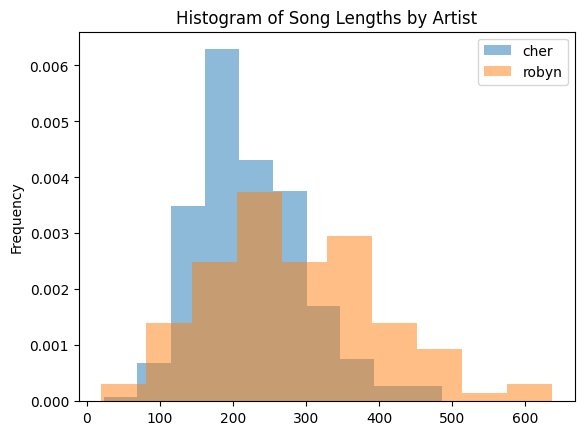

In [19]:
df.groupby('artist')['length'].plot(
    kind="hist", 
    density=True, 
    alpha=0.5, 
    legend=True, 
    title="Histogram of Song Lengths by Artist")